<a href="datacamp.com/workspacecompetition" target="_blank">![banner](banner.png)</a>

# Loan Data

Ready to put your coding skills to the test? Join us for our Workspace Competition.  
For more information, visit [datacamp.com/workspacecompetition](https://datacamp.com/workspacecompetition) 

## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [8]:
# Load packages
import numpy as np 
import pandas as pd 

## Load your data

In [9]:
# Load data from the csv file
df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Understand your variables

In [10]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


Now you can start to explore this dataset with the chance to win incredible prices! Can't think of where to start? Try your hand at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

<h1>data preprocessing</h1>

In [11]:
from sklearn.preprocessing import LabelEncoder
features = df.columns[1:]
x = df.loc[:, features]
le = LabelEncoder()
x.purpose = le.fit_transform(x.purpose)

y = df.credit_policy

<h1>Data splitting</h1>

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

<h1>Basic Models</h1>

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
Classifiers = {
    "Basic Decision Tree": DecisionTreeClassifier(),
    "Basic Random Forest": RandomForestClassifier(),
}

<h2>Evaluation of the basic models</h2>

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [44]:
def different_models(Classifiers, x_train, x_test, y_train, y_test):
    for classifier in Classifiers.keys():
        clf = Classifiers[classifier]
        clf.fit(x_train, y_train)
        predict = clf.predict(x_test)
        print(f'{classifier} classification report: \n')
        print(classification_report(y_test, predict))
        conf_mat = confusion_matrix(y_test, predict)
        print(conf_mat)

different_models(Classifiers, x_train, x_test, y_train, y_test)

Basic Decision Tree classification report: 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       358
           1       0.99      1.00      1.00      1558

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916

[[ 349    9]
 [   4 1554]]
Basic Random Forest classification report: 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       358
           1       0.99      1.00      0.99      1558

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916

[[ 336   22]
 [   0 1558]]


<h2>Results explanations</h2>
As we can see, both Random Forest and Decision Tree had great results, but we can try to improve even that.
Our first try will be with Hyperparameter Tuning.

# <h1>Hyperparameter Tuning</h1>

<h5>First we will define a generic function that takes a model and a parameter grid. </br>
Then we will find it's best hyperparameters and since the grid is pretty large, we will use Random Search.</h5>

In [37]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
def parameter_tuning(x, y, tuned_params, model):
    # Set the parameters by cross-validation
    clf = RandomizedSearchCV(estimator=model, param_distributions=tuned_params, n_iter=100, cv=5, verbose=2,
                                   random_state=42, n_jobs=-1)
    # clf = GridSearchCV(model, tuned_params, cv=5, scoring='accuracy')
    clf.fit(x, y)

    print("Best Hyper parameters found are:")
    print(clf.best_params_)

    print("Grid scores are:")

    means = clf.cv_results_['mean_test_score']
    for mean, params in zip(means, clf.cv_results_['params']):
        print("%0.3f for %r" % (mean, params))

Now we will run the parameter tuning for decision tree and then use its results.

In [ ]:
def decision_tree_tuning(x, y):
    tuned_params = {
        'max_depth': [2, 3, 5, 10, 20],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'criterion': ["gini", "entropy"]
    }

    model = DecisionTreeClassifier()
    parameter_tuning(x, y, tuned_params, model)
    
decision_tree_tuning(x, y)

Now we will run the parameter tuning for Random Forest and then use its results.

In [ ]:
def random_forest_tuning(x, y):
    tuned_params = {
        'n_estimators': [100, 300, 500, 800, 1200],
        'max_depth': [5, 8, 15, 25, 30],
        'min_samples_split': [2, 5, 10, 15, 100],
        'min_samples_leaf': [1, 2, 5, 10],
    }

    model = RandomForestClassifier()
    parameter_tuning(x, y, tuned_params, model)
    
random_forest_tuning(x, y)

# AdaBoost
Now we will fit the best models and try to use AdaBoost for both of them.

In [45]:
from sklearn.ensemble import AdaBoostClassifier
# this is the best Decision Tree from the parameter tuning
decision_tree_best_model = DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_leaf=5)

# this is the best Random Forest from the parameter tuning
rf_best_model = RandomForestClassifier(n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_depth=25)

Classifiers = {
    "Decision Tree best": decision_tree_best_model,
    "Random Forest best": rf_best_model,
    "AdaBoost for Decision Tree": AdaBoostClassifier(base_estimator=decision_tree_best_model),
    "AdaBoost for Random Forest": AdaBoostClassifier(base_estimator=rf_best_model),
}
different_models(Classifiers, x_train, x_test, y_train, y_test)

Decision Tree best classification report: 

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       358
           1       0.99      1.00      0.99      1558

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916

[[ 343   15]
 [   3 1555]]
Random Forest best classification report: 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       358
           1       0.99      1.00      0.99      1558

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916

[[ 336   22]
 [   0 1558]]
AdaBoost for Decision Tree classification report: 

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       358
           1       0.98      1.00      0.99

<h4>AdaBoost results</h4>
As we can see, AdaBoost result for Decision Tree made it less efficient and for the Random Forest it did not improve it at all.

<h4>Now we will use plotting in order to make the visualization better.</h4>

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False,
                    fmt='d')
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")

# Hierarchical Classification

In [47]:
def select_predictions(x_test, y_test, predict, trusted_tags):
    trusted_pred = [(y, pred) for (y, pred) in zip(y_test, predict) 
                    if pred in trusted_tags]
    untrusted_pred = [(x, y) for (x, y, pred) in zip(x_test, y_test, predict) 
                      if pred not in trusted_tags]
    return trusted_pred, untrusted_pred

In [49]:
def hierarchical_classifying(models, trusted_tags_array, x_test, y_test):
    chained_x_test, chained_y_test = x_test.copy(), y_test.copy()
    new_y_test, new_predict = [], []
    for index, model in enumerate(models[:-1]):
        predict = model.predict(chained_x_test)
        trusted_pred, untrusted_pred = select_predictions(chained_x_test, chained_y_test,
                                                          predict, trusted_tags_array[index])
        new_y_test += [item[0] for item in trusted_pred]
        new_predict += [item[1] for item in trusted_pred]

        chained_x_test = [item[0] for item in untrusted_pred]
        chained_y_test = [item[1] for item in untrusted_pred]


    last_model_predict = models[-1].predict(chained_x_test)
    new_y_test += chained_y_test
    new_predict += last_model_predict.tolist()

    print(classification_report(new_y_test, new_predict))
    conf_mat = confusion_matrix(new_y_test, new_predict)
    plot_conf_mat(conf_mat)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       358
           1       0.99      1.00      1.00      1558

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



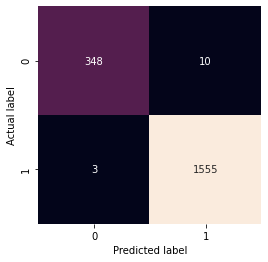

In [53]:
x_test = x_test.values.tolist()
rf_separator_trusted_tags = [0]
trusted_tags_array = [rf_separator_trusted_tags]

models = [rf_best_model, decision_tree_best_model]
hierarchical_classifying(models, trusted_tags_array, x_test, y_test)

### Judging Criteria
| CATEGORY | WEIGHTAGE | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Analysis** | 30%       | <ul><li>Documentation on the goal and what was included in the analysis</li><li>How the question was approached</li><li>Visualisation tools and techniques utilized</li></ul>       |
| **Results**  | 30%       | <ul><li>How the results derived related to the problem chosen</li><li>The ability to trigger potential further analysis</li></ul> |
| **Creativity** | 40% | <ul><li>How "out of the box" the analysis conducted is</li><li>Whether the publication is properly motivated and adds value</li></ul> |